In [50]:
import os
from collections import defaultdict
from typing import NamedTuple, List

import requests
import matplotlib.pyplot as plt
import pandas as pd

In [51]:
parent_url = "https://adsorption.nist.gov/isodb/api/"
browse_url = os.path.join(parent_url, "isotherms.json")

In [52]:
def file_url(filename, api="isotherm"):
    return os.path.join(parent_url, api, f"{filename}.json")

In [53]:
def get_data(filename, api="isotherm"):
    url = file_url(filename, api=api)
    response = requests.get(url)
    
    return response

In [54]:
browse_data = requests.get(browse_url).json()

In [55]:
filename = browse_data[3]["filename"]
# filename = "10.1002adfm.200500561.Isotherm4"

In [56]:
def plot_data(filename):
    data = get_data(filename)
    json_data = data.json()
    pressure_units = json_data["pressureUnits"]
    adsorption_units = json_data["adsorptionUnits"]
    adsorbent = json_data["adsorbent"]["name"]
    adsorbates = ", ".join(d["name"] for d in json_data["adsorbates"])
    pressures = []
    adsorptions = defaultdict(list)
    for d in json_data["isotherm_data"]:
        pressures.append(d["pressure"])
        if d["total_adsorption"] is not None:
            adsorptions["total"].append(d["total_adsorption"])
        else:
            for sd in d["species_data"]:
                adsorptions[sd["InChIKey"]].append(sd["adsorption"])
    for inchi, adsorptions in adsorptions.items():
        name = inchi if inchi == "total" else requests.get(f"https://adsorption.nist.gov/isodb/api/gas/{inchi}.json").json()["name"]
        plt.scatter(pressures, adsorptions, label=name)
        plt.xlabel(f"Pressure ({pressure_units})")
        plt.ylabel(f"Adsorption ({adsorption_units})")
        plt.title(f"Adsorbent: {adsorbent}, Adsorbates: {adsorbates}")
        plt.legend()

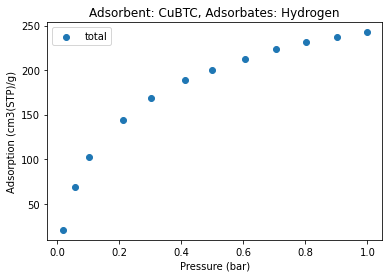

In [57]:
plot_data(browse_data[0]["filename"])

In [58]:
[d for d in browse_data if d["adsorbent"]["hashkey"] == "NIST-MATDB-6b09d0ff0664abd16ff9ce858bbec312"]

[{'filename': '10.1007s110510132071x.Isotherm1',
  'DOI': '10.1007/s11051-013-2071-x',
  'adsorbent': {'hashkey': 'NIST-MATDB-6b09d0ff0664abd16ff9ce858bbec312'},
  'adsorbates': [{'InChIKey': 'UFHFLCQGNIYNRP-UHFFFAOYSA-N'}],
  'category': 'sim',
  'temperature': 100,
  'tabular_data': 0,
  'isotherm_type': ''}]

In [59]:
requests.get("https://adsorption.nist.gov/isodb/api/gas/UFHFLCQGNIYNRP-UHFFFAOYSA-N.json").json()

{'InChIKey': 'UFHFLCQGNIYNRP-UHFFFAOYSA-N',
 'name': 'Hydrogen',
 'InChICode': 'InChI=1S/H2/h1H',
 'formula': 'H2',
 'synonyms': ['Dihydrogen',
  'H2',
  'Hydrogen monohydride',
  'Molecular hydrogen']}

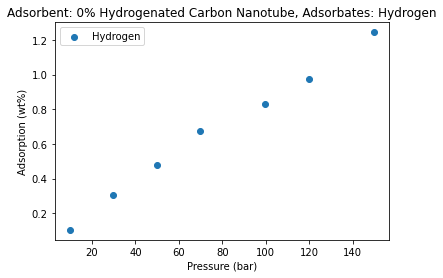

In [60]:
plot_data("10.1007s110510132071x.Isotherm1")

In [61]:
adsorbents = requests.get("https://adsorption.nist.gov/isodb/api/materials.json").json()

In [62]:
[a for a in adsorbents if "SBMOF" in a["name"]]

[{'hashkey': 'NIST-MATDB-36e6d6fa10ea3bfb7d41432cc77db300',
  'name': 'SBMOF-2',
  'synonyms': []}]

In [63]:
get_data("FHNFHKCVQCLJFQ-UHFFFAOYSA-N", api="gas").json()

{'InChIKey': 'FHNFHKCVQCLJFQ-UHFFFAOYSA-N',
 'name': 'Xenon',
 'InChICode': 'InChI=1S/Xe',
 'formula': 'Xe',
 'synonyms': ['Xe']}

In [64]:
[b for b in browse_data if b["adsorbent"]["hashkey"] == "NIST-MATDB-36e6d6fa10ea3bfb7d41432cc77db300"]

[{'filename': '10.1021jacs.5b02556.Isotherm1',
  'DOI': '10.1021/jacs.5b02556',
  'adsorbent': {'hashkey': 'NIST-MATDB-36e6d6fa10ea3bfb7d41432cc77db300'},
  'adsorbates': [{'InChIKey': 'FHNFHKCVQCLJFQ-UHFFFAOYSA-N'}],
  'category': 'exp',
  'temperature': 298,
  'tabular_data': 0,
  'isotherm_type': ''},
 {'filename': '10.1021jacs.5b02556.Isotherm2',
  'DOI': '10.1021/jacs.5b02556',
  'adsorbent': {'hashkey': 'NIST-MATDB-36e6d6fa10ea3bfb7d41432cc77db300'},
  'adsorbates': [{'InChIKey': 'FHNFHKCVQCLJFQ-UHFFFAOYSA-N'}],
  'category': 'exp',
  'temperature': 288,
  'tabular_data': 0,
  'isotherm_type': ''},
 {'filename': '10.1021jacs.5b02556.Isotherm3',
  'DOI': '10.1021/jacs.5b02556',
  'adsorbent': {'hashkey': 'NIST-MATDB-36e6d6fa10ea3bfb7d41432cc77db300'},
  'adsorbates': [{'InChIKey': 'FHNFHKCVQCLJFQ-UHFFFAOYSA-N'}],
  'category': 'exp',
  'temperature': 278,
  'tabular_data': 0,
  'isotherm_type': ''},
 {'filename': '10.1021jacs.5b02556.Isotherm4',
  'DOI': '10.1021/jacs.5b02556',
  

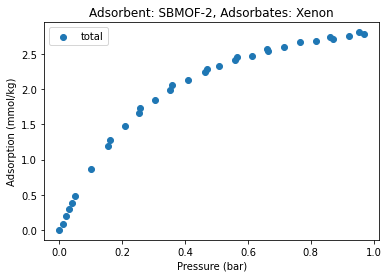

In [66]:
plot_data("10.1021jacs.5b02556.Isotherm1")